Loaded 30 results
Models found: ['lasso', 'lassonet', 'NeuralNet', 'nimo_baseline', 'nimo_variant', 'nimoNew']
Columns: ['model_name', 'iteration', 'best_f1', 'best_threshold', 'y_pred', 'y_prob', 'precision', 'recall', 'selected_features', 'method_has_selection', 'n_selected', 'lasso_C', 'lasso_coefs', 'true_support', 'n_true_features', 'data_type', 'best_lambda', 'best_cv_score', 'hidden_size', 'dropout', 'hp', 'hidden_dim', 'pe_dim']
Data parsing completed!


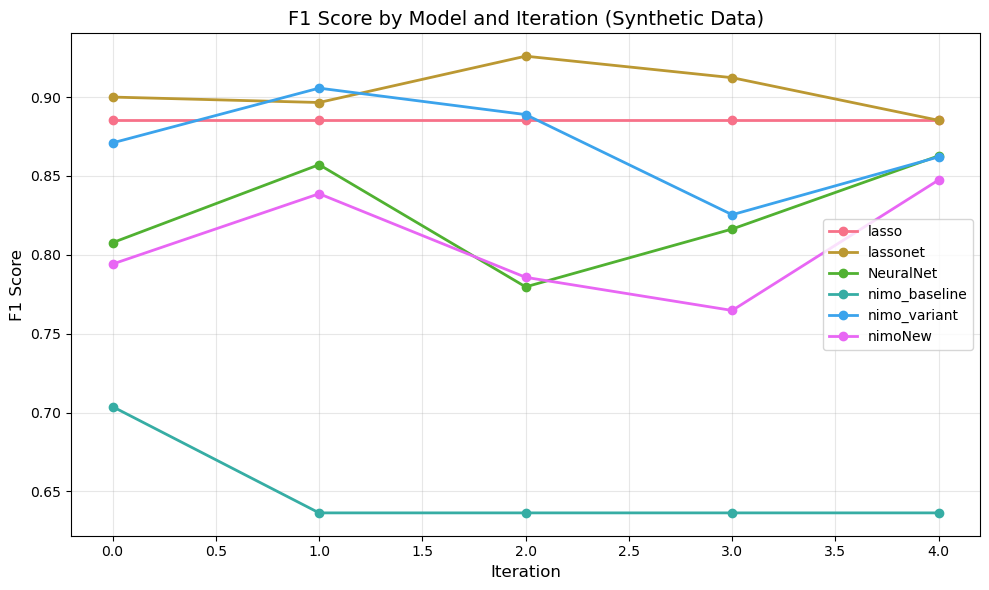

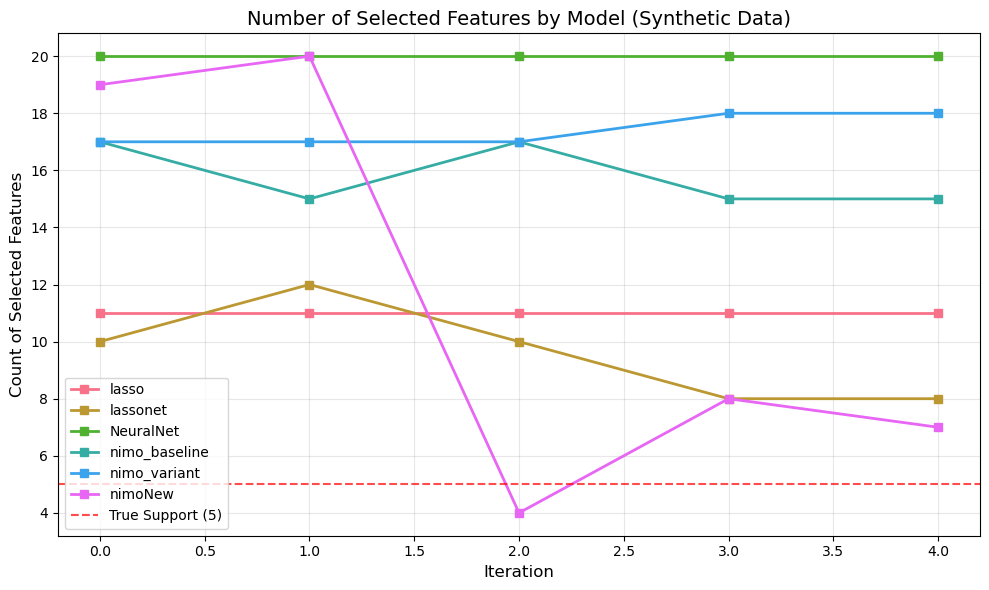

Summary of Best Results:
           Model  Best F1  Iteration  Best Threshold  \
0          lasso    0.885          0           0.343   
1       lassonet    0.926          2           0.505   
2      NeuralNet    0.863          4           0.465   
3  nimo_baseline    0.704          0           0.010   
4   nimo_variant    0.906          1           0.535   
5        nimoNew    0.847          4           0.460   

  Selected Features / Params  
0                     C=0.30  
1                10 features  
2  hidden=128.0, dropout=0.3  
3                17 features  
4                17 features  
5                 7 features  


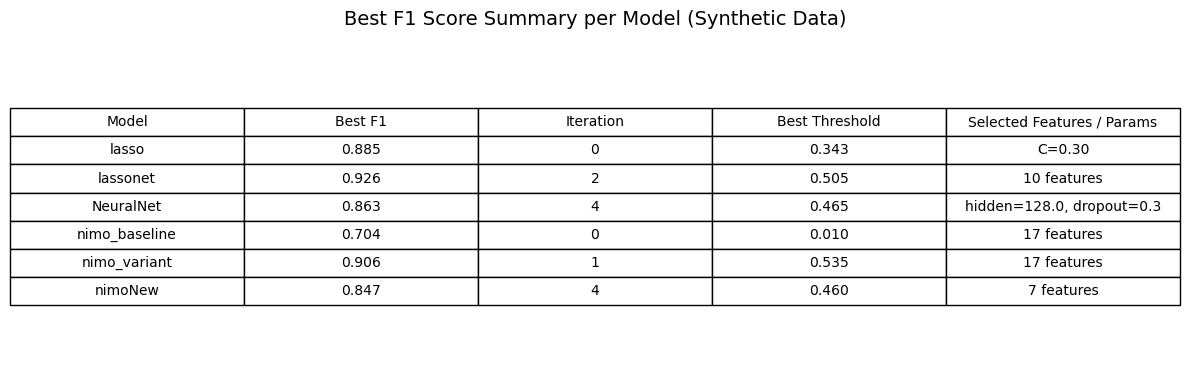

Support Recovery Analysis:
True support features: [0, 1, 8, 15, 17]

lasso:
  Selected: [0, 1, 2, 4, 7, 8, 10, 15, 16, 17, 18]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000

lassonet:
  Selected: [0, 1, 2, 4, 7, 8, 15, 16, 17, 19]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000

NeuralNet:
  Selected: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000

nimo_baseline:
  Selected: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000

nimo_variant:
  Selected: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000

nimoNew:
  Selected: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  Overlap: [] (0/17)
  Precision: 0.000, Recall: 0.000


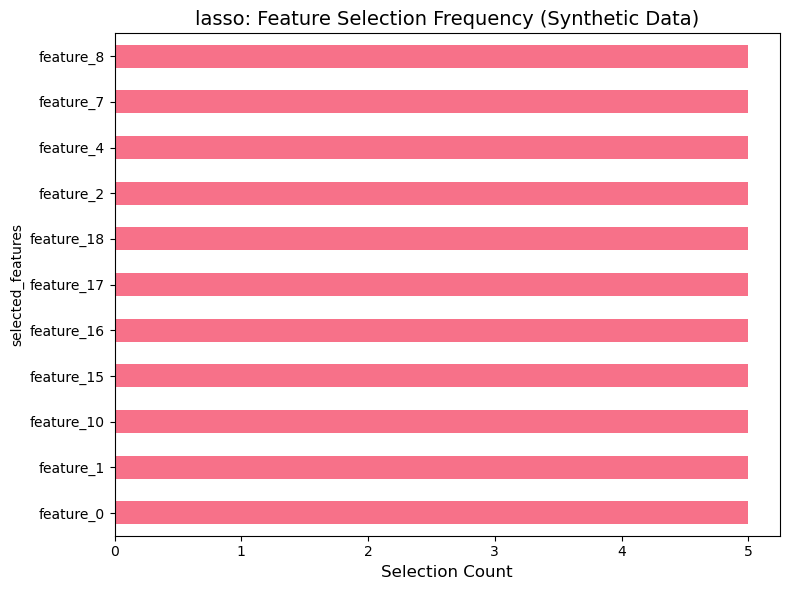

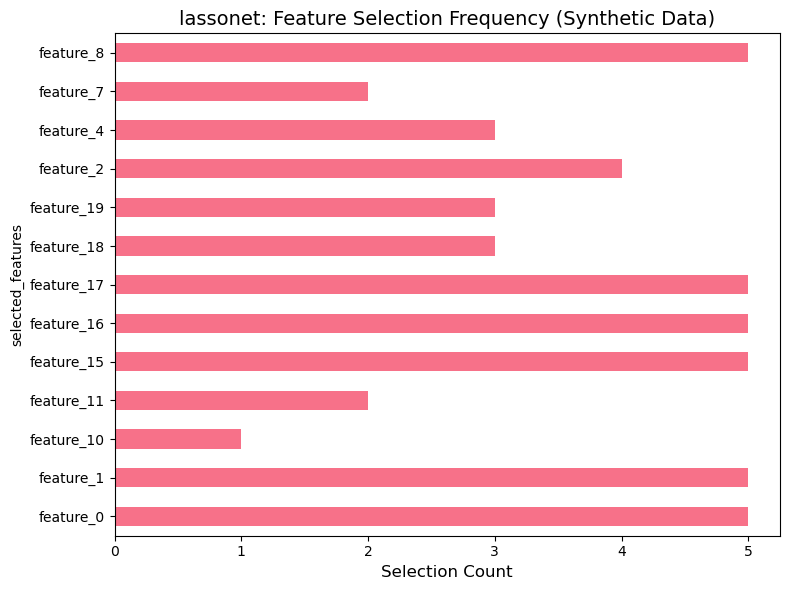

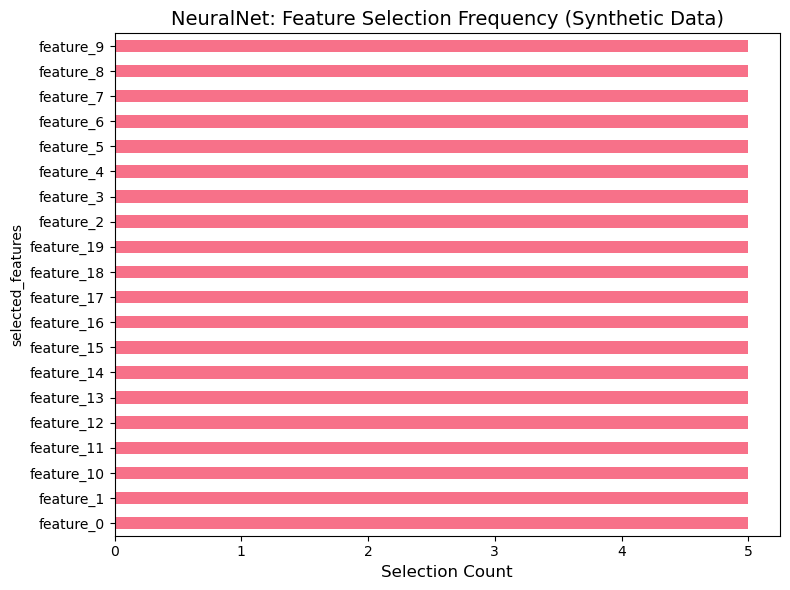

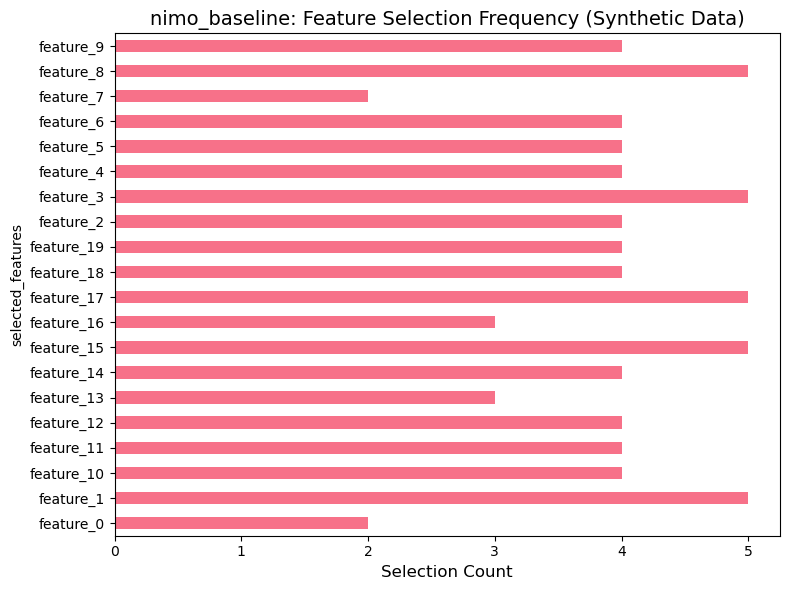

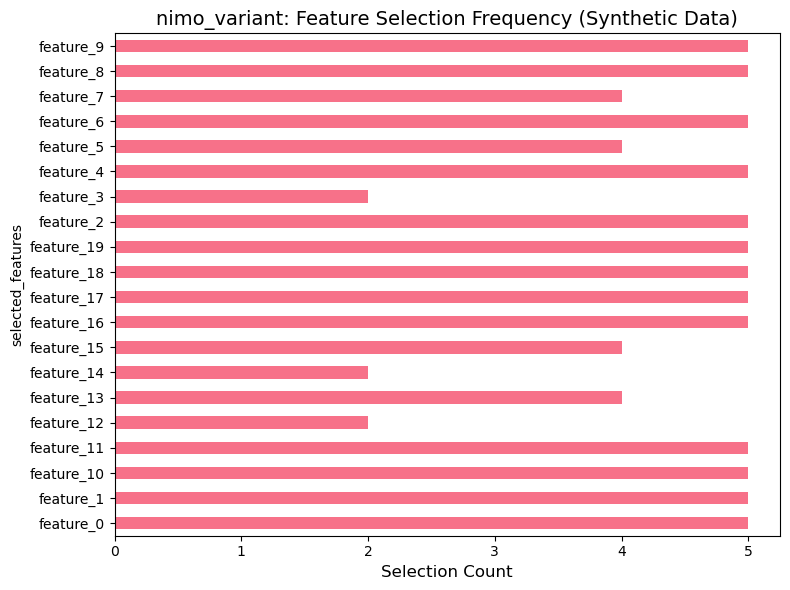

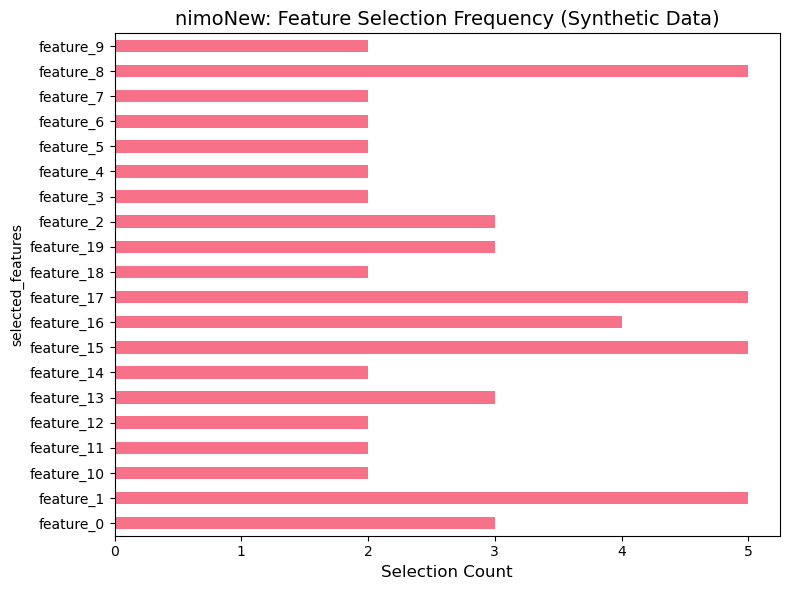

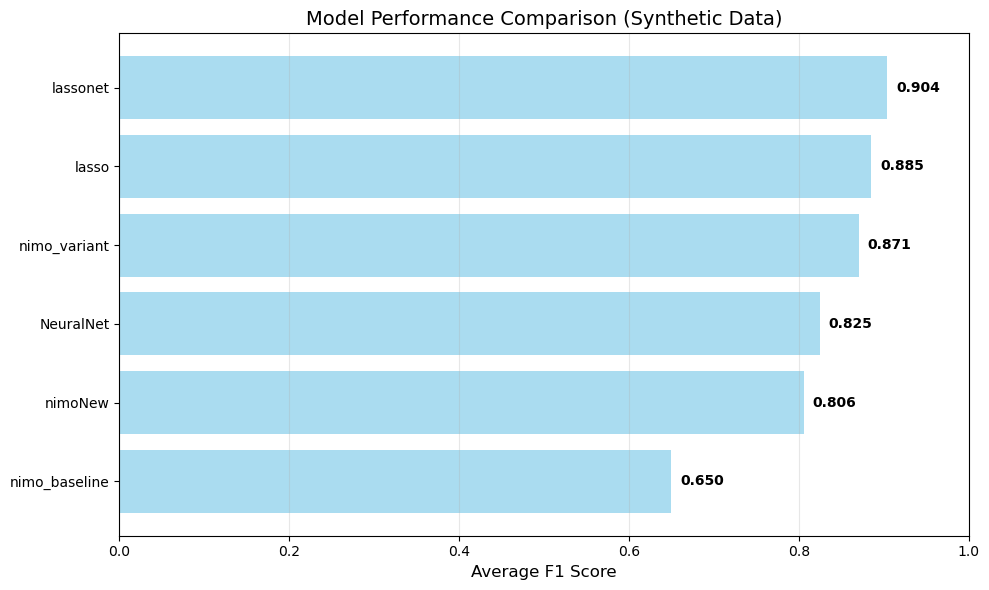

Data Overview:
Total results: 30
Models: ['lasso', 'lassonet', 'NeuralNet', 'nimo_baseline', 'nimo_variant', 'nimoNew']
Columns: ['model_name', 'iteration', 'best_f1', 'best_threshold', 'y_pred', 'y_prob', 'precision', 'recall', 'selected_features', 'method_has_selection', 'n_selected', 'lasso_C', 'lasso_coefs', 'true_support', 'n_true_features', 'data_type', 'best_lambda', 'best_cv_score', 'hidden_size', 'dropout', 'hp', 'hidden_dim', 'pe_dim', 'n_selected_features']
True features: 5
Total features: 11

Sample data:
      model_name  iteration   best_f1  best_threshold  \
0          lasso          0  0.885246        0.343434   
1       lassonet          0  0.900000        0.393939   
2      NeuralNet          0  0.807692        0.464646   
3  nimo_baseline          0  0.703704        0.010101   
4   nimo_variant          0  0.870968        0.161616   

                                              y_pred  \
0  [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...   
1  [0, 0, 1, 1, 1, 1, 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import json


# Cell 2: Load Synthetic Results

# Load synthetic results
df = pd.read_csv("../results/synthetic/all_model_results_synthetic.csv")

print(f"Loaded {len(df)} results")
print(f"Models found: {list(df['model_name'].unique())}")
print(f"Columns: {list(df.columns)}")

# Check if we have successful results or only errors
if 'error' in df.columns and len(df) > 0:
    error_count = df['error'].notna().sum()
    success_count = len(df) - error_count
    print(f"Successful results: {success_count}")
    print(f"Error results: {error_count}")

    if error_count > 0:
        print("\nError summary:")
        error_summary = df[df['error'].notna()]['error'].value_counts()
        print(error_summary)
"""

# Cell 3: Parse Data (Handle different formats)
"""
# Parse the data columns
def parse_list_column(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        # Remove brackets and split by comma
        x = x.strip('[]').replace("'", "").replace('"', '')
        if x == '':
            return []
        return [item.strip() for item in x.split(',')]
    return []

# Parse the columns (only if they exist and we have successful results)
if 'y_pred' in df.columns and 'error' not in df.columns:
    df['y_pred'] = df['y_pred'].apply(parse_list_column)
    df['y_prob'] = df['y_prob'].apply(parse_list_column)
    df['selected_features'] = df['selected_features'].fillna('[]').apply(parse_list_column)
    print("Data parsing completed!")
elif 'error' in df.columns:
    print("Only error results found - skipping data parsing")
else:
    print("Required columns not found - check your results file")
"""

# Cell 4: F1 Score Plot
"""
# Only plot if we have successful results with F1 scores
if 'best_f1' in df.columns and 'error' not in df.columns:
    plt.figure(figsize=(10, 6))
    for model in df['model_name'].unique():
        subset = df[df['model_name'] == model]
        plt.plot(subset['iteration'], subset['best_f1'], marker='o', label=model, linewidth=2, markersize=6)

    plt.title('F1 Score by Model and Iteration (Synthetic Data)', fontsize=14)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No F1 scores available for plotting (only error results)")
"""

# Cell 5: Feature Selection Plot
"""
df['n_selected_features'] = df['selected_features'].apply(len)

plt.figure(figsize=(10, 6))
for model in df['model_name'].unique():
    subset = df[df['model_name'] == model]
    plt.plot(subset['iteration'], subset['n_selected_features'], marker='s', label=model, linewidth=2, markersize=6)

# Add true support line if available
if 'n_true_features' in df.columns:
    true_features = df['n_true_features'].iloc[0]
    plt.axhline(y=true_features, color='red', linestyle='--', alpha=0.7, label=f'True Support ({true_features})')

plt.title('Number of Selected Features by Model (Synthetic Data)', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Count of Selected Features', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
"""

# Cell 6: Summary Table
"""
summary_rows = []
for model in df['model_name'].unique():
    best_row = df[df['model_name'] == model].sort_values(by='best_f1', ascending=False).iloc[0]

    # Dynamic parameter extraction
    params = []
    if 'lasso_C' in best_row and not pd.isna(best_row['lasso_C']):
        params.append(f"C={best_row['lasso_C']:.2f}")
    if 'hidden_size' in best_row and not pd.isna(best_row['hidden_size']):
        params.append(f"hidden={best_row['hidden_size']}")
    if 'dropout' in best_row and not pd.isna(best_row['dropout']):
        params.append(f"dropout={best_row['dropout']:.1f}")
    if 'best_params' in best_row and not pd.isna(best_row['best_params']):
        params.append(f"params={best_row['best_params']}")

    param_str = ", ".join(params) if params else f"{len(best_row['selected_features'])} features"

    summary_rows.append({
        'Model': best_row['model_name'],
        'Best F1': best_row['best_f1'],
        'Iteration': best_row['iteration'],
        'Best Threshold': best_row['best_threshold'],
        'Selected Features / Params': param_str
    })

summary_df = pd.DataFrame(summary_rows)
print("Summary of Best Results:")
print(summary_df.round(3))
"""

# Cell 7: Summary Table Visualization
"""
formatted = summary_df.copy()
formatted['Best F1'] = formatted['Best F1'].map(lambda x: f"{x:.3f}")
formatted['Best Threshold'] = formatted['Best Threshold'].map(lambda x: f"{x:.3f}")

fig, ax = plt.subplots(figsize=(12, 1 + 0.5 * len(formatted)))
ax.axis('off')
table = ax.table(
    cellText=formatted.values,
    colLabels=formatted.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title("Best F1 Score Summary per Model (Synthetic Data)", fontsize=14)
plt.tight_layout()
plt.show()
"""

# Cell 8: Support Recovery Analysis (if true support available)
"""
# Only run this if we have true support information
if 'true_support' in df.columns and 'n_true_features' in df.columns:
    print("Support Recovery Analysis:")
    print("=" * 40)

    true_support = df['true_support'].iloc[0]
    print(f"True support features: {true_support}")

    for model in df['model_name'].unique():
        model_df = df[df['model_name'] == model]
        selected_features = model_df['selected_features'].iloc[0]

        # Convert feature names to indices if needed
        if selected_features and isinstance(selected_features[0], str):
            selected_indices = [int(f.split('_')[-1]) for f in selected_features if '_' in f]
        else:
            selected_indices = selected_features

        # Calculate overlap
        if true_support and selected_indices:
            overlap = set(true_support).intersection(set(selected_indices))
            precision = len(overlap) / len(selected_indices) if selected_indices else 0
            recall = len(overlap) / len(true_support) if true_support else 0

            print(f"\n{model}:")
            print(f"  Selected: {selected_indices}")
            print(f"  Overlap: {list(overlap)} ({len(overlap)}/{len(true_support)})")
            print(f"  Precision: {precision:.3f}, Recall: {recall:.3f}")
else:
    print("No true support information available for support recovery analysis.")
"""

# Cell 9: Feature Selection Frequency (like original)
"""
# Create feature selection frequency plot for each model
for model in df['model_name'].unique():
    model_df = df[df['model_name'] == model]

    # Explode selected features
    exploded = model_df.explode('selected_features')
    if len(exploded) > 0:
        counts = exploded['selected_features'].value_counts().sort_index()

        plt.figure(figsize=(8, 6))
        counts.plot.barh()
        plt.xlabel('Selection Count', fontsize=12)
        plt.title(f'{model}: Feature Selection Frequency (Synthetic Data)', fontsize=14)
        plt.tight_layout()
        plt.show()
"""

# Cell 10: Model Comparison Bar Plot
"""
# Compare average F1 scores across models
plt.figure(figsize=(10, 6))
f1_means = df.groupby('model_name')['best_f1'].mean().sort_values(ascending=True)

bars = plt.barh(range(len(f1_means)), f1_means.values, color='skyblue', alpha=0.7)
plt.yticks(range(len(f1_means)), f1_means.index)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, f1_means.values)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', va='center', fontweight='bold')

plt.xlabel('Average F1 Score', fontsize=12)
plt.title('Model Performance Comparison (Synthetic Data)', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
"""

# Cell 11: Data Overview
"""
print("Data Overview:")
print("=" * 20)
print(f"Total results: {len(df)}")
print(f"Models: {list(df['model_name'].unique())}")
print(f"Columns: {list(df.columns)}")

if 'n_true_features' in df.columns:
    print(f"True features: {df['n_true_features'].iloc[0]}")
    print(f"Total features: {len(df['selected_features'].iloc[0]) if df['selected_features'].iloc[0] else 0}")

print(f"\nSample data:")
print(df.head())
